In [1]:
import pandas as pd

df = pd.read_csv("./times.csv")
df["time"] = df["time"] * 10e5
df

,algorithm,array_length,time
0,plain,512,10.74980
1,plain,1024,14.62870
2,plain,2048,20.15450
3,plain,4096,34.95220
4,plain,8192,57.93790
5,plain,16384,106.53300
6,auto,512,8.06904
7,auto,1024,9.51870
8,auto,2048,9.50490
9,auto,4096,12.21550


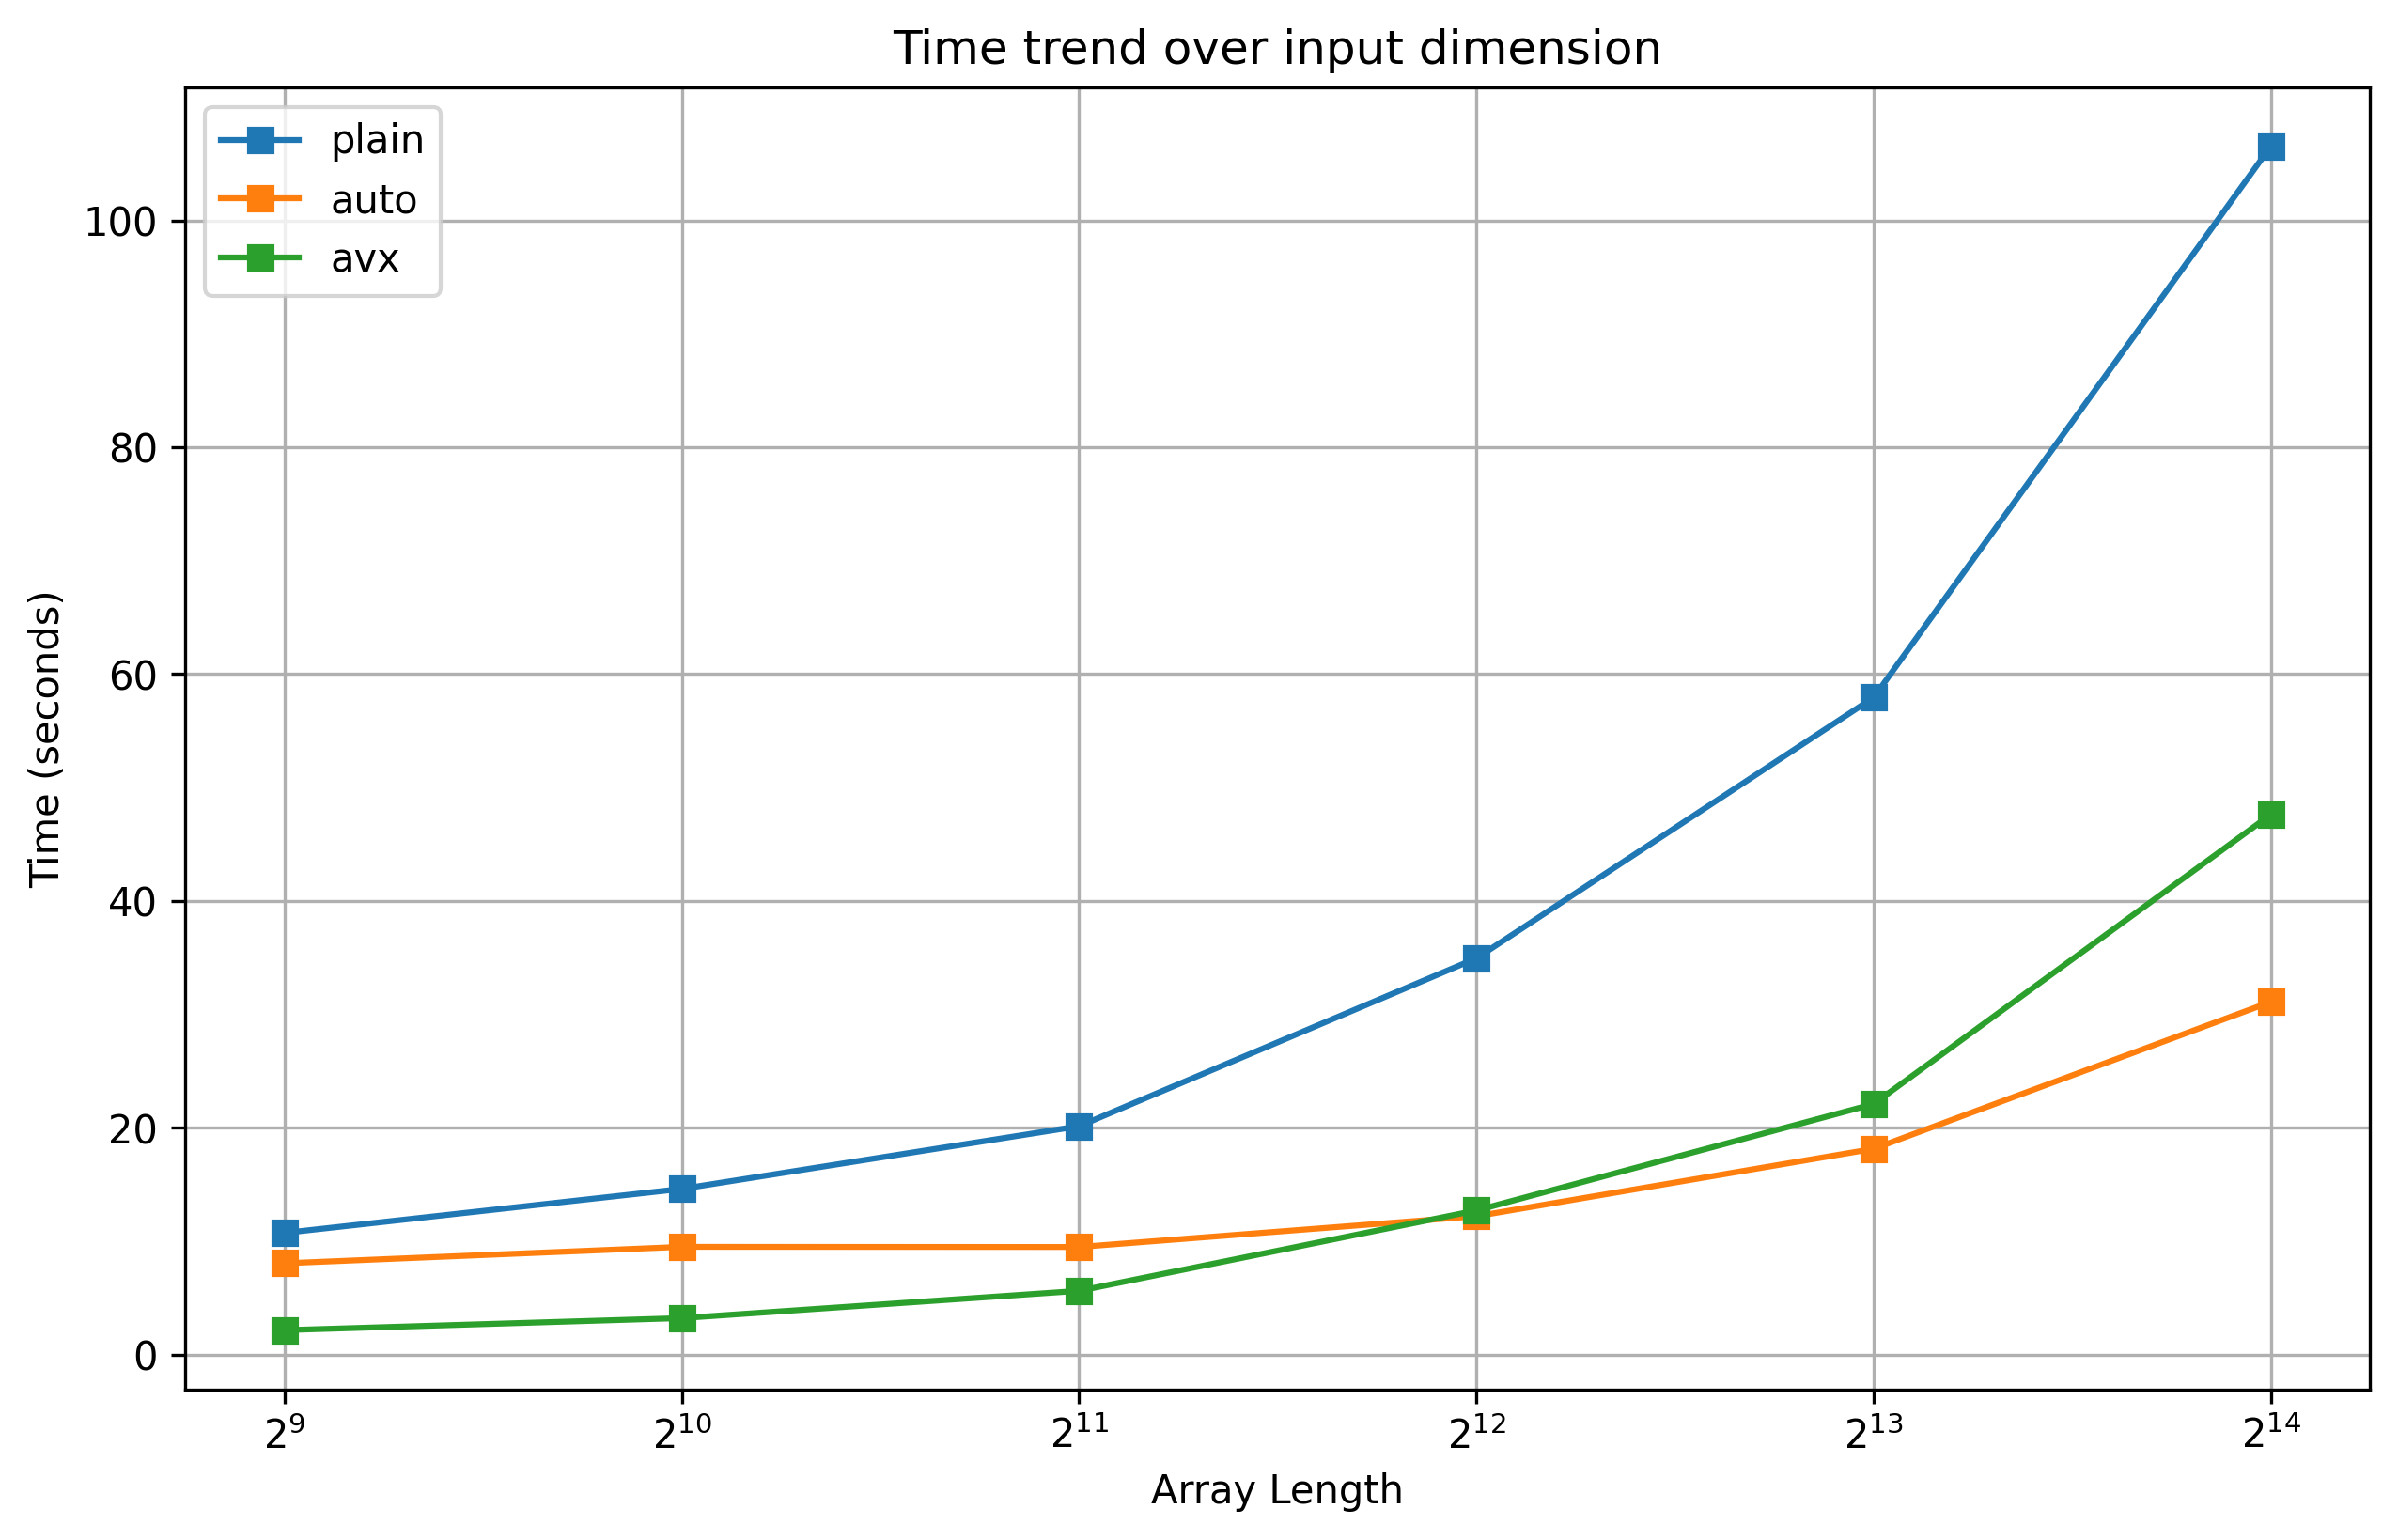

In [2]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6), dpi=300)
plt.title("Time trend over input dimension")

algs = df["algorithm"].unique()
for alg in algs:
    tmp = df[df["algorithm"] == alg][["array_length", "time"]]
    plt.plot(tmp["array_length"], tmp["time"], marker="s", label=alg)

plt.xlabel("Array Length")
plt.ylabel("Time (seconds)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
# plt.savefig("trend.svg")
plt.show()

In [3]:
speed_ups = []

algs = df["algorithm"].unique()
sizes = df["array_length"].unique()

for alg in algs:
    for s in sizes:
        mask_plain = (df["algorithm"] == "plain") & (df["array_length"] == s)
        mask = (df["algorithm"] == alg) & (df["array_length"] == s)

        time_plain = df[mask_plain]["time"].iloc[0]
        time_alg = df[mask]["time"].iloc[0]
        speed_ups.append(time_plain / time_alg)

df["speed_up"] = speed_ups
df

,algorithm,array_length,time,speed_up
0,plain,512,10.74980,1.000000
1,plain,1024,14.62870,1.000000
2,plain,2048,20.15450,1.000000
3,plain,4096,34.95220,1.000000
4,plain,8192,57.93790,1.000000
5,plain,16384,106.53300,1.000000
6,auto,512,8.06904,1.332228
7,auto,1024,9.51870,1.536838
8,auto,2048,9.50490,2.120433
9,auto,4096,12.21550,2.861299


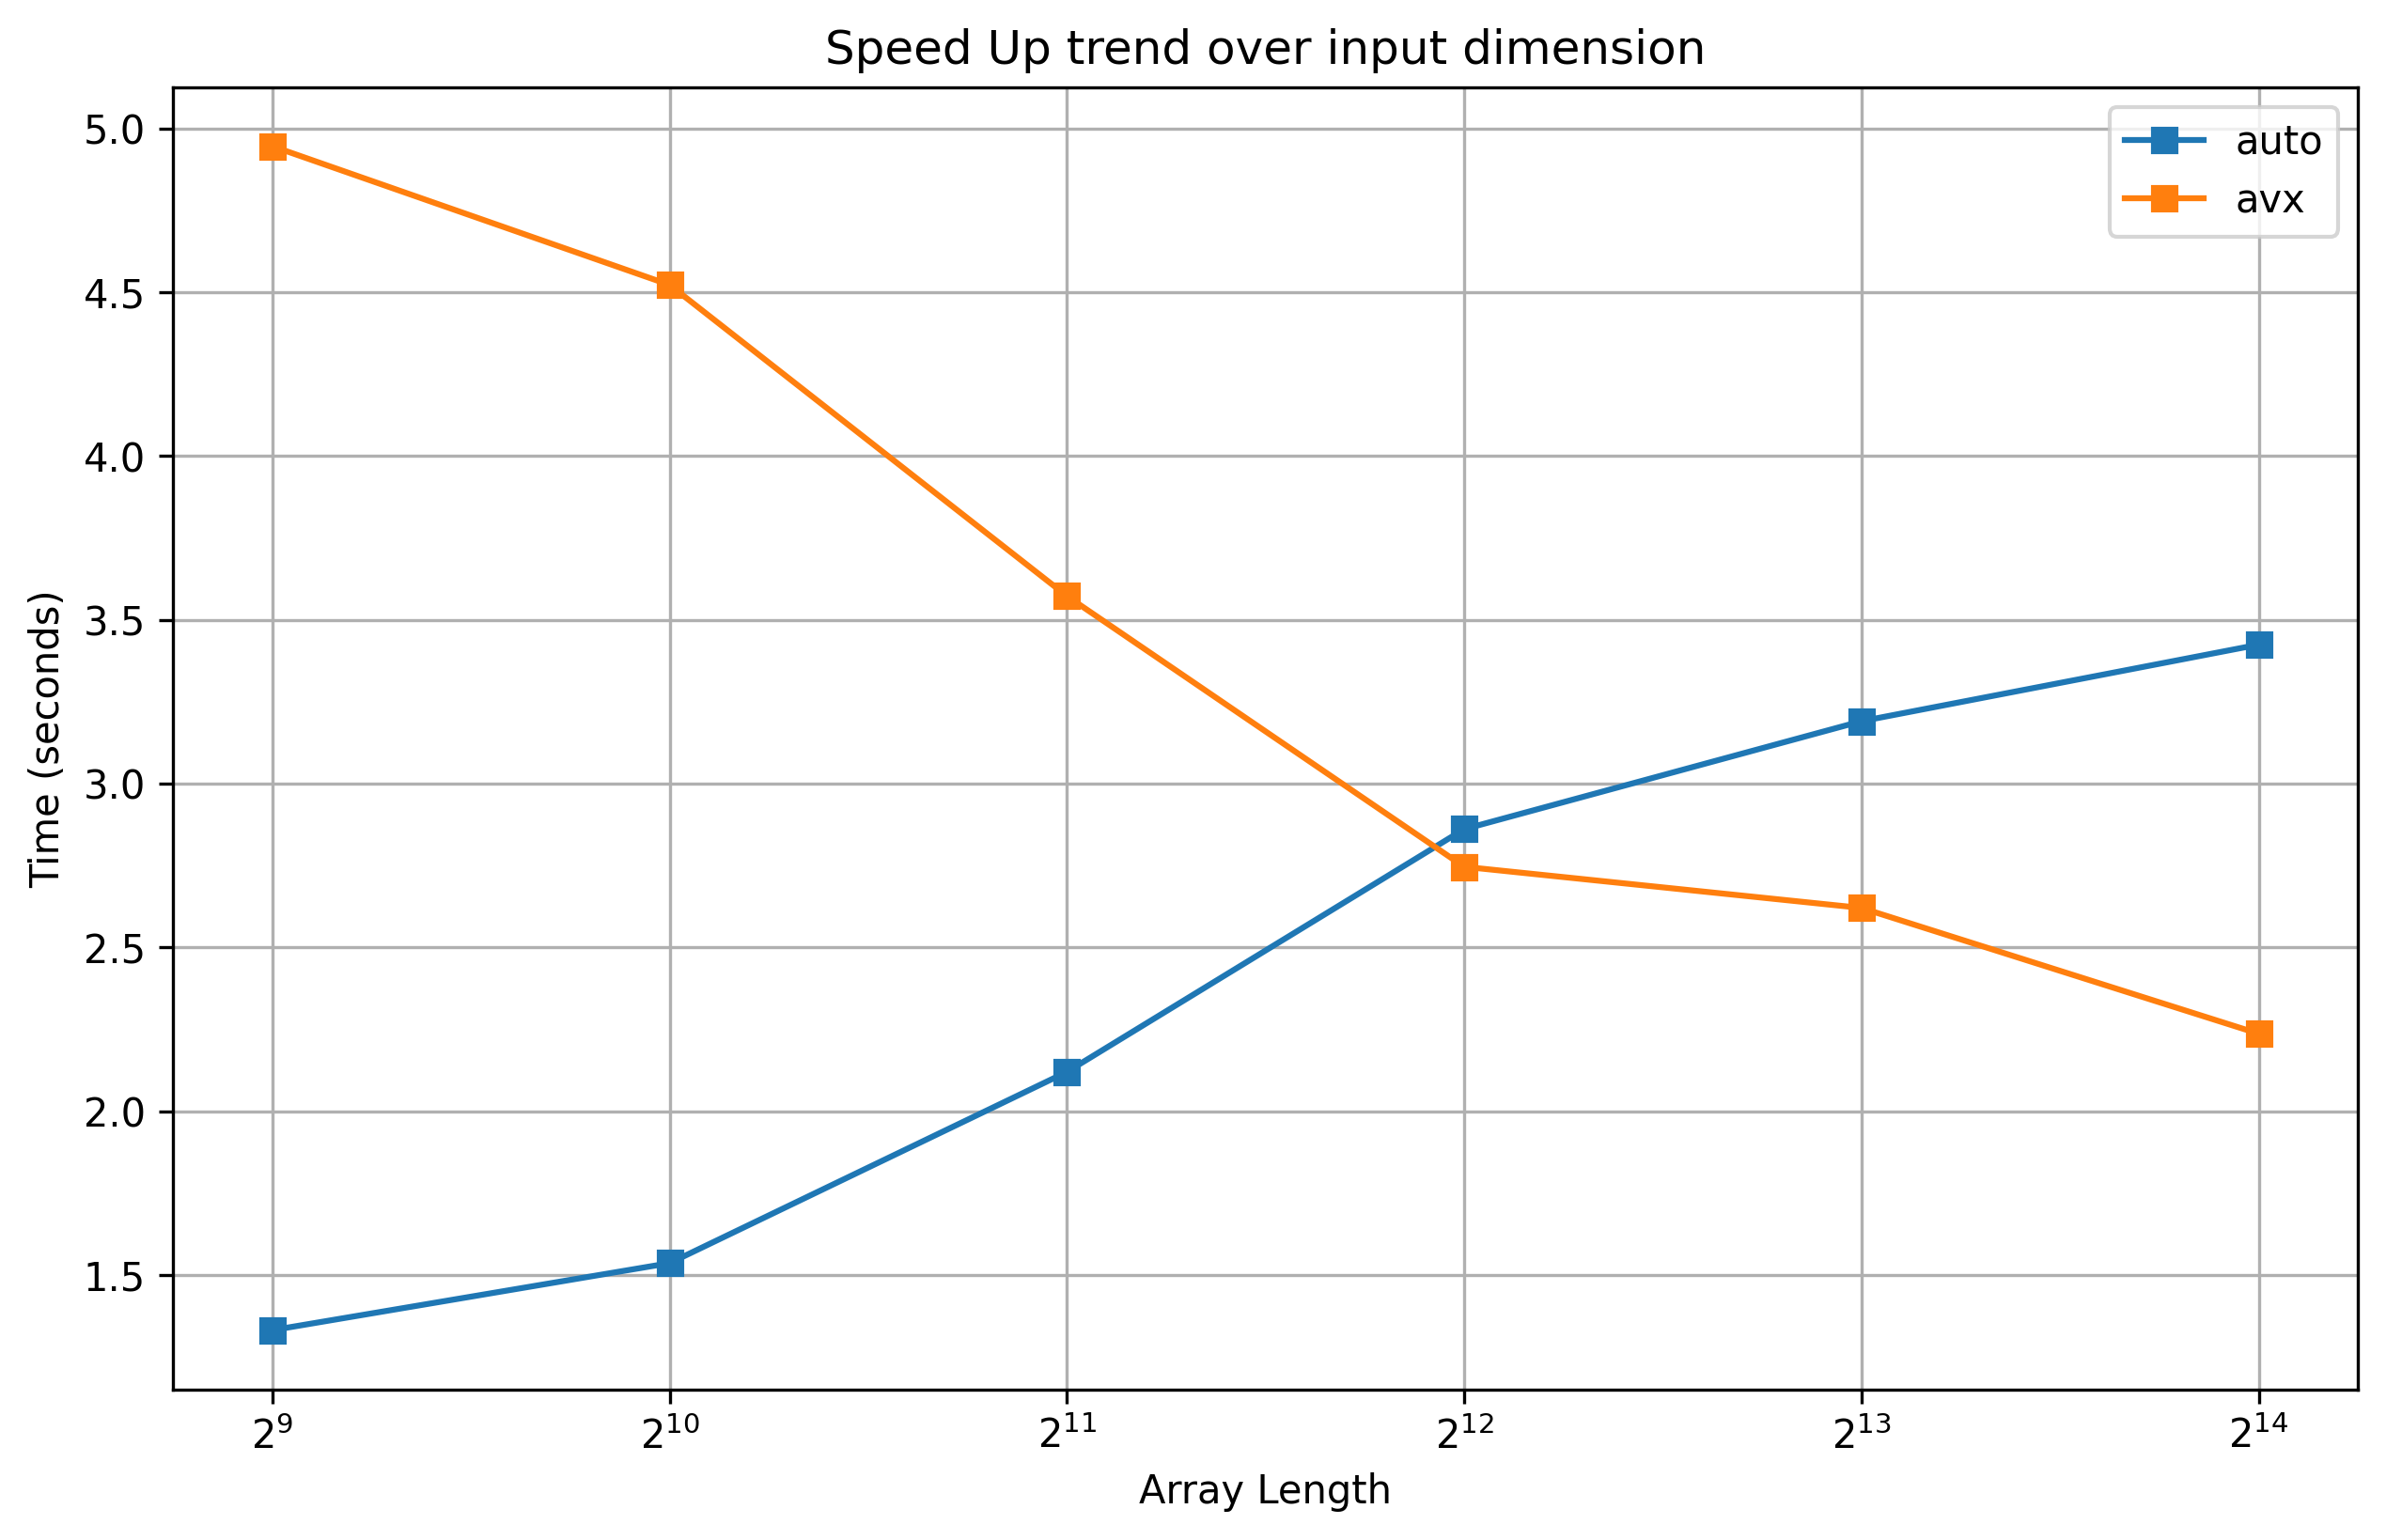

In [4]:
plt.figure(figsize=(10, 6), dpi=300)
plt.title("Speed Up trend over input dimension")

for alg in algs:
    tmp = df[df["algorithm"] == alg][["array_length", "speed_up"]]
    if alg != "plain":
        plt.plot(tmp["array_length"], tmp["speed_up"], marker="s", label=alg)

plt.xlabel("Array Length")
plt.ylabel("Time (seconds)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
# plt.savefig("trend.svg")
plt.show()